In [14]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cleaned_twitter_data (3).csv')

# Sample 5 random rows
df.sample(n=5)


,target,stemmed_content
594929,0,happycassi tell gonna cri cassi want make cri
206172,0,kristyycruuu idea im tri see what upp night plan
1438434,1,awesom day readii c wut maro gonna brng still ...
1271352,1,youngq nite nite rob thank join armi rock
243248,0,colleg work bust full blast


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv('cleaned_twitter_data (3).csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


   target                                    stemmed_content
0       0  switchfoot http twitpic com zl awww bummer sho...
1       0  upset updat facebook text might cri result sch...
2       0  kenichan dive mani time ball manag save rest g...
3       0                    whole bodi feel itchi like fire
4       0                      nationwideclass behav mad see
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   target           1600000 non-null  int64 
 1   stemmed_content  1599505 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [8]:
# Check for missing values
print(df.isnull().sum())

# Remove any rows with missing values if they exist
df = df.dropna()

target               0
stemmed_content    495
dtype: int64


In [9]:
# Split the data into features (X) and target (y)
X = df['stemmed_content']
y = df['target']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer
#TF-IDF vectorization to convert the text data into numerical features.
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)


In [11]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Logistic Regression Results:
Accuracy: 0.7680

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76    159373
           1       0.76      0.79      0.77    160528

    accuracy                           0.77    319901
   macro avg       0.77      0.77      0.77    319901
weighted avg       0.77      0.77      0.77    319901



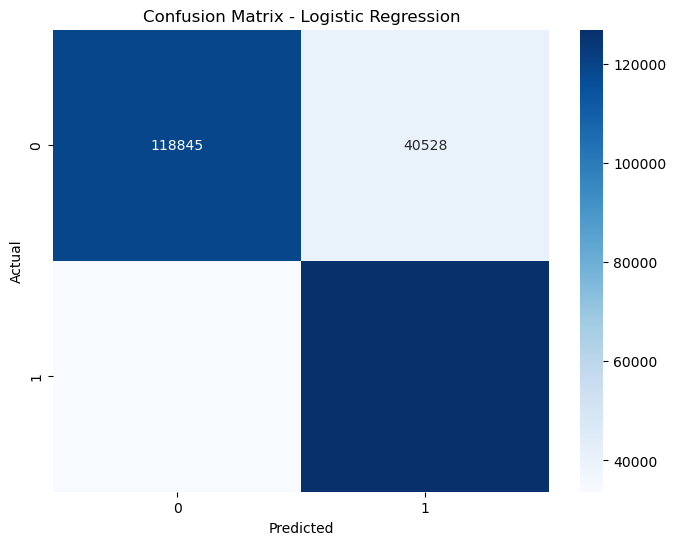

In [12]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
train_and_evaluate_model(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "Logistic Regression")




Random Forest Results:
Accuracy: 0.7631

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    159373
           1       0.76      0.77      0.76    160528

    accuracy                           0.76    319901
   macro avg       0.76      0.76      0.76    319901
weighted avg       0.76      0.76      0.76    319901



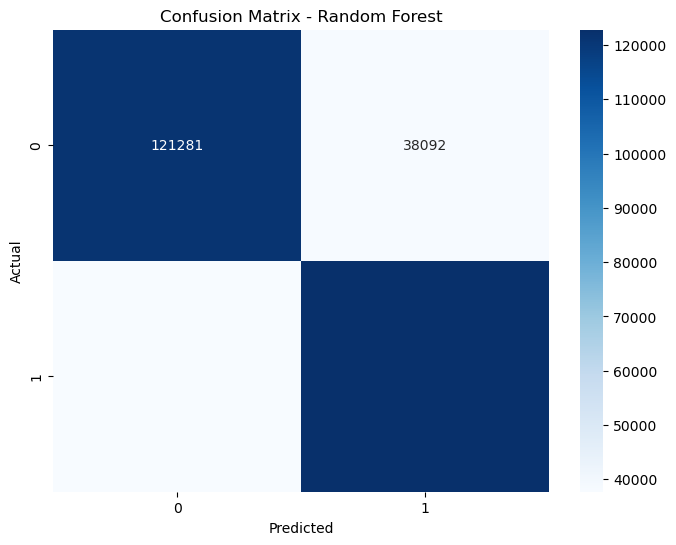

In [13]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "Random Forest")


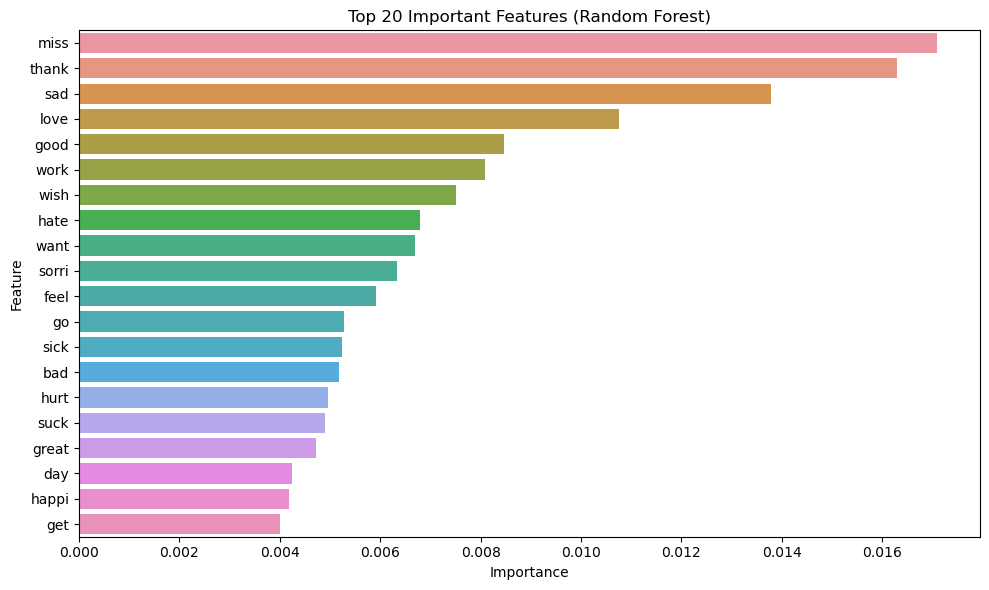

In [15]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [16]:
# Function to predict sentiment for new tweets
def predict_sentiment(model, vectorizer, tweets):
    # Vectorize the tweets
    tweets_tfidf = vectorizer.transform(tweets)
    
    # Make predictions
    predictions = model.predict(tweets_tfidf)
    
    # Map predictions to sentiment labels
    sentiment_labels = ['Negative' if pred == 0 else 'Positive' for pred in predictions]
    
    return sentiment_labels

# Example usage
new_tweets = [
    "I love this product! It's amazing!",
    "This is the worst experience I've ever had.",
    "The weather is nice today."
]

lr_predictions = predict_sentiment(lr_model, tfidf, new_tweets)
rf_predictions = predict_sentiment(rf_model, tfidf, new_tweets)

print("\nSentiment Predictions for New Tweets:")
for tweet, lr_pred, rf_pred in zip(new_tweets, lr_predictions, rf_predictions):
    print(f"Tweet: {tweet}")
    print(f"Logistic Regression Prediction: {lr_pred}")
    print(f"Random Forest Prediction: {rf_pred}")
    print()



Sentiment Predictions for New Tweets:
Tweet: I love this product! It's amazing!
Logistic Regression Prediction: Positive
Random Forest Prediction: Positive

Tweet: This is the worst experience I've ever had.
Logistic Regression Prediction: Negative
Random Forest Prediction: Negative

Tweet: The weather is nice today.
Logistic Regression Prediction: Positive
Random Forest Prediction: Positive

